<a href="https://colab.research.google.com/github/afdmoraes/GEOSelper/blob/main/Tarefa3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Curso de Programação para Sensoriamento Remoto
---

* Gilberto Ribeiro de Queiroz
* Thales Sehn Körting
* Estudante: André Fabiano de Moraes
* Data: 04/12/2022

## Tarefa da Semana 3

Esta é a terceira tarefa do curso de Programação para Sensoriamento Remoto. Crie um Jupyter Notebook no seu Google Colab para reportar os resultados obtidos. Inclua blocos de código e texto para informar as partes realizadas.

---

## Atividades

Faça o download de um recorte da imagem Landsat-8 (LO82190762017351CUB00_B123456789_crop.tif) e insira no seu Jupyter Notebook. A imagem possui 9 bandas, nesta ordem:

      * 1 coastal 
      * 2 blue 
      * 3 green 
      * 4 red 
      * 5 nir
      * 6 swir1
      * 7 swir2
      * 8 pan
      * 9 cirrus

(a) calcule 3 índices espectrais (NDVI, NDWI e NDBI). O NDBI (Normalized Difference Built-up Index) gera um produto que ressalta áreas construídas, e tem a seguinte fórmula:

      NDBI = (SWIR1 - NIR) / (SWIR1 + NIR)

(b) crie um plot com 1 linha e 3 colunas, apresentando as imagens dos 3 índices calculados.

(c) mostre os valores mínimos e máximos de cada uma das 9 bandas da imagem.

    Atenção: apresente o link do seu Jupyter Notebook, através da opção Compartilhar do próprio Google Colab, da seguinte forma:

      * Compartilhar
      * Mudar para qualquer pessoa com o link
      * Copiar link

In [11]:
#Importando a Biblioteca GDAL
from osgeo import gdal

gdal.UseExceptions()

In [12]:
#Consultando a versão dos softwares
print ("Versão GDAL", gdal.__version__)
print ("Versão Python")
!python --version
print ("Versão Jupyter")
!jupyter --version
print ("Versão Jupyter Notebook")
!jupyter notebook --version

Versão GDAL 2.2.3
Versão Python
Python 3.8.15
Versão Jupyter
Selected Jupyter core packages...
IPython          : 7.9.0
ipykernel        : 5.3.4
ipywidgets       : 7.7.1
jupyter_client   : 6.1.12
jupyter_core     : 4.11.2
jupyter_server   : not installed
jupyterlab       : not installed
nbclient         : not installed
nbconvert        : 5.6.1
nbformat         : 5.7.0
notebook         : 5.7.16
qtconsole        : not installed
traitlets        : 5.1.1
Versão Jupyter Notebook
5.7.16


In [15]:
# Auto completar / 
gdal.Open?

In [16]:
# Para abrir o arquivo
dataset = gdal.Open("LO82190762017351CUB00_B123456789_crop.tif", gdal.GA_ReadOnly)

# Atualizar a leitura do dataset
type(dataset)

#osgeo.gdal.Dataset

osgeo.gdal.Dataset

In [17]:
# Estrutura do Dataset
dataset.GetProjectionRef()

'PROJCS["WGS 84 / UTM zone 23N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",-45],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32623"]]'

In [18]:
# Transformação AFIM
#  método GetGeoTransform retorna uma tupla com os 06 coeficientes 
GT = dataset.GetGeoTransform()

print(GT)

(327165.0, 30.0, 0.0, -2583165.0, 0.0, -30.0)


Na tupla acima, temos o seguinte:

| Índice | Coeficiente | Descrição  |
|---|---|---|
| 0 | 327165.0 | Coordenada-$x$ do pixel do canto superior esquerdo da imagem. |
| 1 | 30.0 | Resolução do pixel ao longo do eixo-$x$. |
| 2 | 0.0 | Rotação ao longo das linhas. Zero para imagens alinhadas ao norte (*north-up image*). |
| 3 | -2583165.0 | Coordenada-$y$ do pixel do canto superior esquerdo da imagem. |
| 4 | 0.0 | Rotação ao longo das colunas. Zero para imagens alinhadas ao norte (*north-up image*) |
| 5 | -30.0 | Resolução do pixel ao longo do eixo-$y$. |

Os parâmetros acima podem ser usados na seguinte equação de transformação:

$$
\begin{cases}
X_{geo} = GT[0] + Coluna * GT[1] + Linha * GT[2]\\
Y_{geo} = GT[3] + Coluna * GT[4] + Linha * GT[5]
\end{cases}
$$

<br/>

No caso de imagens alinhadas ao norte (*north up images*), essa equação se resume a:

$$
\begin{cases}
X_{geo} = GT[0] + Coluna * GT[1]\\
Y_{geo} = GT[3] + Linha * GT[5]
\end{cases}
$$

In [19]:
# Vamos calcular a localização no espaço geográfico do pixel da (coluna 20, linha 30):
coluna = 20
linha = 30

x = GT[0] + coluna * GT[1]
y = GT[3] + linha * GT[5]

print(x, y)

327765.0 -2584065.0


In [20]:
# Para saber o número de linhas e colunas do dataset que está sendo utilizado, devemos utilizar as propriedades RasterYSize e RasterXSize conforme pode ser visto no exemplo abaixo:
linhas = dataset.RasterYSize
colunas = dataset.RasterXSize

print ("Número de linhas:", linhas)
print ("Número de colunas:", colunas)

Número de linhas: 1728
Número de colunas: 2951


In [21]:
# Para saber o número de bandas de um Dataset, podemos utilizar a propriedade RasterCount, como indicado abaixo:
dataset.RasterCount
print (dataset.RasterCount)
# Como pode ser observado na saída acima, o arquivo crop_rapideye.tif possui 5 bandas espectrais.
print ("Como observado o arquivo - LO82190762017351CUB00_B123456789_crop.tif, possui várias BANDAS, totalizando: ")

#dataset.RasterCount 
print (dataset.RasterCount)
print ("Bandas segmentadas!")

9
Como observado o arquivo - LO82190762017351CUB00_B123456789_crop.tif, possui várias BANDAS, totalizando: 
9
Bandas segmentadas!


No caso da amostra de imagem RapidEye, as bandas 5 e 3 correspondem às bandas NIR e RED. Para acessar os dados dessas bandas, devemos utilizar o método GetRasterBand, que retornará um objeto capaz de manipular os dados de uma dada banda. A célula abaixo mostra como utilizar essa operação.



In [22]:
#banda_nir = dataset.GetRasterBand(5)
#banda_red = dataset.GetRasterBand(3)

banda_coastal = dataset.GetRasterBand(1)
banda_blue = dataset.GetRasterBand(2)
banda_green = dataset.GetRasterBand(3)
banda_red = dataset.GetRasterBand(4)
banda_nir = dataset.GetRasterBand(5)
banda_swir1 = dataset.GetRasterBand(6)
banda_swir2 = dataset.GetRasterBand(7)
banda_pan = dataset.GetRasterBand(8)
banda_cirrus = dataset.GetRasterBand(9)


In [23]:
# Uma propriedade importante para manipulação correta dos dados é o tipo do dado armazenado e que pode ser lido a partir da banda.
# 1 coastal 
# 2 blue 
# 3 green 
# 4 red 
# 5 nir
# 6 swir1
# 7 swir2
# 8 pan
# 9 cirrus

print ("Tipos de dados:")
print (" - banda COASTAL:", gdal.GetDataTypeName(banda_coastal.DataType))
print (" - banda BLUE:", gdal.GetDataTypeName(banda_blue.DataType))
print (" - banda GREEN:", gdal.GetDataTypeName(banda_green.DataType))
print (" - banda RED:", gdal.GetDataTypeName(banda_red.DataType))
print (" - banda NIR:", gdal.GetDataTypeName(banda_nir.DataType))
print (" - banda SWIR1:", gdal.GetDataTypeName(banda_swir1.DataType))
print (" - banda SWIR2:", gdal.GetDataTypeName(banda_swir2.DataType))
print (" - banda PAN:", gdal.GetDataTypeName(banda_pan.DataType))
print (" - banda CIRRUS:", gdal.GetDataTypeName(banda_cirrus.DataType))

#print (" - banda NIR:", gdal.GetDataTypeName(banda_nir.DataType))
#print (" - banda RED:", gdal.GetDataTypeName(banda_red.DataType))

Tipos de dados:
 - banda COASTAL: UInt16
 - banda BLUE: UInt16
 - banda GREEN: UInt16
 - banda RED: UInt16
 - banda NIR: UInt16
 - banda SWIR1: UInt16
 - banda SWIR2: UInt16
 - banda PAN: UInt16
 - banda CIRRUS: UInt16


In [24]:
# (b) crie um plot com 1 linha e 3 colunas, apresentando as imagens dos 3 índices calculados.

# banda_coastal [1]
# banda_blue [2]
# banda_green [3]
# banda_red [4]
# banda_nir [5]
# banda_swir1 [6]
# banda_swir2 [7]
# banda_pan [8]
# banda_cirrus [9]

# COASTAL - É possível saber quais os valores mínimo e máximo dos pixels de uma banda utilizando o método ComputeRasterMinMax:
menor_valor, maior_valor = banda_coastal.ComputeRasterMinMax()
print("Menor valor de COASTAL:", menor_valor)
print("Maior valor de COASTAL:", maior_valor)

# BLUE É possível saber quais os valores mínimo e máximo dos pixels de uma banda utilizando o método ComputeRasterMinMax:
menor_valor, maior_valor = banda_blue.ComputeRasterMinMax()
print("Menor valor de BLUE:", menor_valor)
print("Maior valor de BLUE:", maior_valor)

# GREEN É possível saber quais os valores mínimo e máximo dos pixels de uma banda utilizando o método ComputeRasterMinMax:
menor_valor, maior_valor = banda_green.ComputeRasterMinMax()
print("Menor valor de GREEN:", menor_valor)
print("Maior valor de GREEN:", maior_valor)

# RED É possível saber quais os valores mínimo e máximo dos pixels de uma banda utilizando o método ComputeRasterMinMax:
menor_valor, maior_valor = banda_red.ComputeRasterMinMax()
print("Menor valor de RED:", menor_valor)
print("Maior valor de RED:", maior_valor)

# NIR É possível saber quais os valores mínimo e máximo dos pixels de uma banda utilizando o método ComputeRasterMinMax:
menor_valor, maior_valor = banda_nir.ComputeRasterMinMax()
print("Menor valor de NIR:", menor_valor)
print("Maior valor de NIR:", maior_valor)

# SWIR1 É possível saber quais os valores mínimo e máximo dos pixels de uma banda utilizando o método ComputeRasterMinMax:
menor_valor, maior_valor = banda_swir1.ComputeRasterMinMax()
print("Menor valor de SWIR1:", menor_valor)
print("Maior valor de SWIR1:", maior_valor)

# SWIR2 É possível saber quais os valores mínimo e máximo dos pixels de uma banda utilizando o método ComputeRasterMinMax:
menor_valor, maior_valor = banda_swir2.ComputeRasterMinMax()
print("Menor valor de SWIR2:", menor_valor)
print("Maior valor de SWIR2", maior_valor)

# PAN É possível saber quais os valores mínimo e máximo dos pixels de uma banda utilizando o método ComputeRasterMinMax:
menor_valor, maior_valor = banda_pan.ComputeRasterMinMax()
print("Menor valor de PAN:", menor_valor)
print("Maior valor de PAN:", maior_valor)

# CIRRUS É possível saber quais os valores mínimo e máximo dos pixels de uma banda utilizando o método ComputeRasterMinMax:
menor_valor, maior_valor = banda_cirrus.ComputeRasterMinMax()
print("Menor valor de CIRRUS:", menor_valor)
print("Maior valor de CIRRUS:", maior_valor)



Menor valor de COASTAL: 0.0
Maior valor de COASTAL: 54603.0
Menor valor de BLUE: 0.0
Maior valor de BLUE: 52485.0
Menor valor de GREEN: 0.0
Maior valor de GREEN: 57614.0
Menor valor de RED: 0.0
Maior valor de RED: 65535.0
Menor valor de NIR: 0.0
Maior valor de NIR: 65535.0
Menor valor de SWIR1: 0.0
Maior valor de SWIR1: 65535.0
Menor valor de SWIR2: 0.0
Maior valor de SWIR2 59742.0
Menor valor de PAN: 0.0
Maior valor de PAN: 65535.0
Menor valor de CIRRUS: 0.0
Maior valor de CIRRUS: 11059.0


In [25]:
# Leitura dos dados de uma banda
# banda_coastal [1]
# banda_blue [2]
# banda_green [3]
# banda_red [4]
# banda_nir [5]
# banda_swir1 [6]
# banda_swir2 [7]
# banda_pan [8]
# banda_cirrus [9]
matriz_coastal = banda_coastal.ReadAsArray()
matriz_blue = banda_blue.ReadAsArray()
matriz_green = banda_green.ReadAsArray()
matriz_red = banda_red.ReadAsArray()
matriz_nir = banda_nir.ReadAsArray()
matriz_swir1 = banda_swir1.ReadAsArray()
matriz_swir2 = banda_swir2.ReadAsArray()
matriz_pan = banda_pan.ReadAsArray()
matriz_cirrus = banda_cirrus.ReadAsArray()

type(matriz_coastal)
type(matriz_blue)
type(matriz_green)
type(matriz_red)
type(matriz_nir)
type(matriz_swir1)
type(matriz_swir2)
type(matriz_pan)
type(matriz_cirrus)

numpy.ndarray

In [27]:
matriz_coastal
matriz_coastal.shape

matriz_blue
matriz_blue.shape

matriz_green
matriz_green.shape

matriz_red
matriz_red.shape

matriz_nir
matriz_nir.shape

matriz_swir1
matriz_swir1.shape

matriz_swir2
matriz_swir2.shape

matriz_pan
matriz_pan.shape

matriz_cirrus
matriz_cirrus.shape

(1728, 2951)

In [28]:

#Para saber o tipos de dados das células da matriz, podemos usar a propriedade dtype:
matriz_coastal.dtype
matriz_blue.dtype
matriz_green.dtype
matriz_red.dtype
matriz_nir.dtype
matriz_swir1.dtype
matriz_swir2.dtype
matriz_pan.dtype
matriz_cirrus.dtype

matriz_coastal = banda_coastal.ReadAsArray()
matriz_blue = banda_blue.ReadAsArray()
matriz_green = banda_green.ReadAsArray()
matriz_red = banda_red.ReadAsArray()
matriz_nir = banda_nir.ReadAsArray()
matriz_swir1 = banda_swir1.ReadAsArray()
matriz_swir2 = banda_swir2.ReadAsArray()
matriz_pan = banda_pan.ReadAsArray()
matriz_cirrus = banda_cirrus.ReadAsArray()

In [51]:
# Agora, vamos computar um índice de vegetação, o NDVI, a partir das matrizes com os valores das bandas RED e NIR:
matriz_coastal = matriz_coastal.astype(float)
matriz_blue = matriz_blue.astype(float)
matriz_green = matriz_green.astype(float)
matriz_red = matriz_red.astype(float)
matriz_nir = matriz_nir.astype(float)
matriz_swir1 = matriz_swir1.astype(float)
matriz_swir2 = matriz_swir2.astype(float)
matriz_pan = matriz_pan.astype(float)
matriz_cirrus = matriz_cirrus.astype(float)



# (a) calcule 3 índices espectrais (NDVI, NDWI e NDBI). O NDBI (Normalized 
# Difference Built-up Index) gera um produto que ressalta áreas construídas,
# e tem a seguinte fórmula:
# Fórmula
#  NDBI = (SWIR1 - NIR) / (SWIR1 + NIR)


# NDVI  ########################
matriz_ndvi = (matriz_nir - matriz_red) / \
 (matriz_nir + matriz_red + 0.000000001)
print("NDVI =")
print(matriz_ndvi.shape)
print(matriz_ndvi.dtype)

# NDWI  ######################## O NDWI, Índice de Água Diferencial Normalizado, 
# é usado para observar o estado da água da cultura. É utilizado para observar o
# estado hídrico da cultura, identificar déficits e saturação de umidade na 
# cultura. Este índice usa bandas verdes e infravermelhas próximas de imagens de
# satélite.
#  * 1 coastal 
#  * 2 blue 
#  * 3 green 
#  * 4 red 
#  * 5 nir
#  * 6 swir1
#  * 7 swir2
#  * 8 pan
#  * 9 cirrus

matriz_ndwi = (matriz_green - matriz_red) / \
 (matriz_green + matriz_red + 0.000000001)
print("NDWI =")
print(matriz_ndwi.shape)
print(matriz_ndwi.dtype)





# NDBI (Normalized Difference Built-up Index) gera um produto que ressalta
# áreas construídas, e tem a seguinte fórmula:
#  NDBI = (SWIR1 - NIR) / (SWIR1 + NIR)
matriz_ndbi = (matriz_swir1 - matriz_nir) / \
 (matriz_swir1 + matriz_nir + 0.000000001)
print("NDBI =")
print(matriz_ndbi.shape)
print(matriz_ndbi.dtype)


#############################################
# Agora, vamos computar um índice de vegetação, o NDVI, a partir das matrizes com os valores das bandas RED e NIR:
# geracao de array derivado das bandas
#matriz_ndvi = (matriz_nir - matriz_red) / \
#              (matriz_nir + matriz_red + 0.000000001)

# mostrar as dimensoes e tipo de dado da matriz de saida
# print(matriz_ndvi.shape)
# print(matriz_ndvi.dtype)

NDVI =
(1728, 2951)
float64
NDWI =
(1728, 2951)
float64
NDBI =
(1728, 2951)
float64


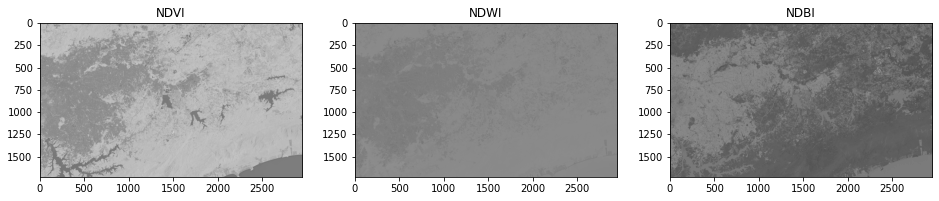

In [52]:
# (c) mostre os valores mínimos e máximos de cada uma das 9 bandas da imagem.

# Podemos combinar as bibliotecas NumPy e Matplotlib para visualizar as matrizes como imagens.
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 8))

#plt.subplot(131)
#lt.title("Banda RED")
#plt.imshow(matriz_red, cmap='gray');

#plt.subplot(132)
#plt.title("Banda NIR")
#plt.imshow(matriz_nir, cmap='gray');

plt.subplot(131)
plt.title("NDVI")
plt.imshow(matriz_ndvi, cmap='gray', vmin=-1.0, vmax=1.0);

plt.subplot(132)
plt.title("NDWI")
plt.imshow(matriz_ndwi, cmap='gray', vmin=-1.0, vmax=1.0);

plt.subplot(133)
plt.title("NDBI")
plt.imshow(matriz_ndbi, cmap='gray', vmin=-1.0, vmax=1.0);